# Supervised Logistic Regression for Classification
<hr>

## 0. Import library

In [1]:
# Import libraries

# math library
import numpy as np

# visualization library
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png2x','pdf')
import matplotlib.pyplot as plt

# machine learning library
from sklearn.linear_model import LogisticRegression

# 3d visualization
from mpl_toolkits.mplot3d import axes3d

# computational time
import time


## 1. Load dataset
<hr>

The data features $x_i=(x_{i(1)},x_{i(2)})$ represent 2 exam grades $x_{i(1)}$ and $x_{i(2)}$ for each student $i$.

The data label $y_i$ indicates if the student $i$ was admitted (value is 1) or rejected (value is 0).

In [2]:
# import data with numpy
data = np.loadtxt('dataset.txt', delimiter=',')

# number of training data
n = data.shape[0]
print('Number of training data=',n)

Number of training data= 100


## 2. Explore the dataset distribution
<hr>

Plot the training data points.<br>

You may use matplotlib function `scatter(x,y)`.

In [3]:
x1 = data[:,0] # exam grade 1
x2 = data[:,1] # exam grade 2
idx_admit = (data[:,2]==1) # index of students who were admitted
idx_rejec = (data[:,2]==0) # index of students who were rejected

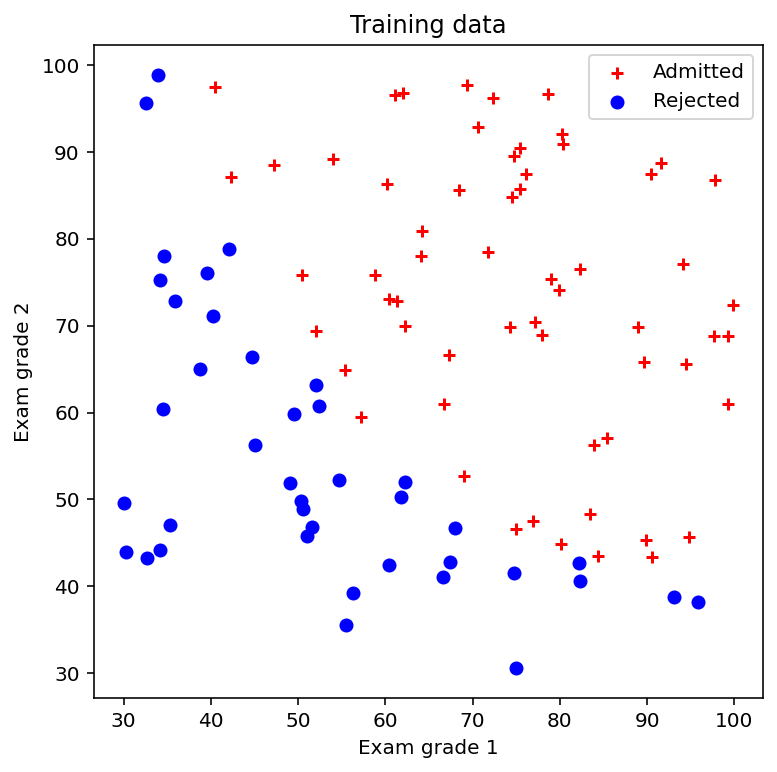

In [4]:
plt.figure(figsize=(6,6))
plt.scatter(x1[idx_admit], x2[idx_admit], marker='+', color='r')
plt.scatter(x1[idx_rejec], x2[idx_rejec], marker='o', color='b') 
plt.title('Training data')
plt.xlabel('Exam grade 1')
plt.ylabel('Exam grade 2')
plt.legend(['Admitted', 'Rejected'])
plt.show()

## 3. Sigmoid/logistic function
<hr>

$$
\sigma(\eta) = \frac{1}{1 + \exp^{-\eta}}
$$

Define and plot the sigmoid function for values in [-10,10]:

You may use functions `np.exp`, `np.linspace`.

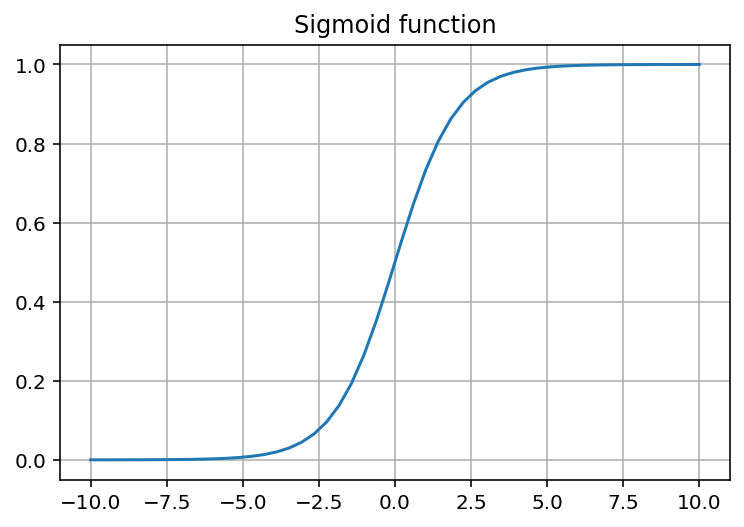

In [5]:
def sigmoid(z):
    
    #sigmoid_f = [1 / (1 + np.exp(1)**(-1 * zi)) for zi in z]
    sigmoid_f = 1 / (1 + np.exp(1)**(-1 * z))
    
    return sigmoid_f

# plot
x_values = np.linspace(-10,10)

plt.figure(2)
plt.plot(x_values,sigmoid(x_values))
plt.title("Sigmoid function")
plt.grid(True)

## 4. Define the prediction function for the classification
<hr>

#### The prediction function is defined by:

$$
\begin{aligned}
p_w(x) = \sigma(w_0 + w_1 x_{(1)} + w_2 x_{(2)}) = \sigma(w^T x)
\end{aligned}
$$

#### Implement the prediction function in a vectorised way as follows:

$$
X = 
\left[ 
\begin{array}{cccc}
1 & x_{1(1)} & x_{1(2)} \\ 
1 & x_{2(1)} & x_{2(2)} \\ 
\vdots\\
1 & x_{n(1)} & x_{n(2)} 
\end{array} 
\right]
\quad
\textrm{ and }
\quad
w = 
\left[ 
\begin{array}{cccc}
w_0 \\ 
w_1 \\ 
w_2
\end{array} 
\right]
\quad
\Rightarrow 
\quad
p_w(x) = \sigma(X w)  =
\left[ 
\begin{array}{cccc}
\sigma(w_0 + w_1 x_{1(1)} + w_2 x_{1(2)}) \\ 
\sigma(w_0 + w_1 x_{2(1)} + w_2 x_{2(2)}) \\ 
\vdots\\
\sigma(w_0 + w_1 x_{n(1)} + w_2 x_{n(2)})
\end{array} 
\right]
$$

Use the new function `sigmoid`.

In [6]:
# construct the data matrix X
n = data[:,:2].shape
X = np.insert(data[:,:2],0,1.0,axis=1)

# parameters vector
w = np.array([0.1, 0.2, 0.3])[:, None]

# predictive function definition
def f_pred(X,w):
    
    p = sigmoid(np.dot(X, w))
    
    return p

y_pred = f_pred(X,w)

## 5. Define the classification loss function 
<hr>

#### Mean Square Error

$$
L(w) = \frac{1}{n} \sum_{i=1}^n \left( \sigma( w^T x_i ) - y_i \right)^2
$$

#### Cross-Entropy

$$
L(w) = \frac{1}{n} \sum_{i=1}^n \left( - y_i \log( \sigma( w^T x_i ) ) - (1 - y_i) \log( 1 - \sigma( w^T x_i ) ) \right)
$$

#### The vectorized representation is for the mean square error is as follows:

$$
L(w) = \frac{1}{n} \Big( p_w(x) - y \Big)^T \Big( p_w(x) - y \Big)
$$

#### The vectorized representation is for the cross-entropy error is as follows:

$$
L(w) = \frac{1}{n} \Big( - y^T \log(p_w(x)) - (1-y)^T \log(1-p_w(x)) \Big)
$$

where

$$
p_w(x)= \sigma(Xw)=
\left[ 
\begin{array}{cccc}
\sigma(w_0 + w_1 x_{1(1)} + w_2 x_{1(2)}) \\ 
\sigma(w_0 + w_1 x_{2(1)} + w_2 x_{2(2)}) \\ 
\vdots\\
\sigma(w_0 + w_1 x_{n(1)} + w_2 x_{n(2)})
\end{array} 
\right]
\quad
\textrm{ and }
\quad
y = 
\left[ 
\begin{array}{cccc}
y_1 \\ 
y_2 \\ 
\vdots\\
y_n
\end{array} 
\right]
$$

You may use numpy functions `.T` and `np.log`.

In [7]:
def mse_loss(label, h_arr):  # mean square error 
    pred = sigmoid(np.dot(w.T, h_arr))
    return np.mean(pred - label)

def ce_loss(label, h_arr):  # cross-entropy error
    pred = sigmoid(np.dot(w.T, h_arr))
    term1 = -1 * label * np.log(pred)
    term2 = (1 - label) * np.log(1 - pred)
    return np.mean(term1 - term2) 

In [8]:
def mse_loss(label, h_arr):  # mean square error 
    #pred = sigmoid(np.dot(w.T, h_arr))
    return np.mean(np.dot((h_arr-label).T, (h_arr-label)))

def ce_loss(label, h_arr):  # cross-entropy error
    pred = sigmoid(np.dot(w.T, h_arr))
    term1 = np.dot(-1 * label.T, np.log(pred))
    term2 = np.dot((1 - label).T, np.log(1 - pred))
    return np.mean(term1 - term2) 

## 6. Define the gradient of the classification loss function 
<hr>

#### Given the mean square loss

$$
L(w) = \frac{1}{n} \Big( p_w(x) - y \Big)^T \Big( p_w(x) - y \Big)
$$

The gradient is given by  

$$
\frac{\partial}{\partial w} L(w) = \frac{2}{n} X^T \Big( (p_w(x)-y) \odot (p_w(x) \odot (1-p_w(x)) \Big) 
$$

#### Given the cross-entropy loss

$$
L(w) = \frac{1}{n} \Big( - y^T \log(p_w(x)) - (1-y)^T \log(1-p_w(x)) \Big)
$$

The gradient is given by  

$$
\frac{\partial}{\partial w} L(w) = \frac{2}{n} X^T(p_w(x)-y)
$$

#### Implement the vectorized version of the gradient of the classification loss function

In [24]:
# loss function definition
def loss_logreg(y_pred,y): 
    n = len(y)
    loss = 2 / n * (np.dot(X.T, (y_pred - y)))
    return loss

def loss_logreg(y_pred, y):
    #n = len(y)
    #loss1 = -1 * np.dot(y.T, np.log(y_pred))
    #loss2 = np.dot((1-y).T, np.log(1-y_pred))
        
    return np.dot((y_pred - y).T, (y_pred-y)) / len(y)


# Test loss function 
y = data[:,2][:,None] # label 
y_pred = f_pred(X,w) # prediction

loss = loss_logreg(y_pred,y)

In [23]:
loss

array([[0.4]])

## 7. Implement the gradient descent algorithm 
<hr>

#### Vectorized implementation for the mean square loss: 
$$
w^{k+1} = w^{k} - \tau \frac{2}{n} X^T \Big( (p_w(x)-y) \odot (p_w(x) \odot (1-p_w(x)) \Big) 
$$

#### Vectorized implementation for the cross-entropy loss: 
$$
w^{k+1} = w^{k} - \tau \frac{2}{n} X^T(p_w(x)-y)
$$

#### Plot the loss values $L(w^k)$ w.r.t. iteration $k$ the number of iterations for the both loss functions.

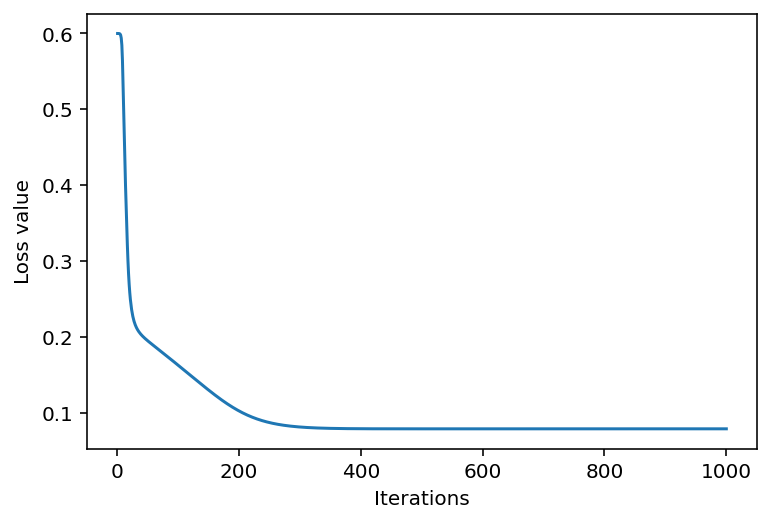

In [27]:
# gradient descent function definition
def grad_desc(X, y , w_init=np.array([0,0,0])[:,None] ,tau=1e-4, max_iter=500):

    def grad_loss(y_pred,y,X):
        return (np.dot(X.T, (y_pred - y))) / len(X) * 2
    
    L_iters = np.zeros([max_iter]) # record the loss values    
    w_iters = np.zeros([max_iter,2]) # record the loss values
    w = w_init # initialization

    for i in range(max_iter): # loop over the iterations
        
        y_pred = f_pred(X, w) # linear predicition function  
        grad_f = grad_loss(y_pred, y, X) # gradient of the loss 
        
        w = w - tau* grad_f # update rule of gradient descent 
        L_iters[i] = loss_logreg(y_pred,y) # save the current loss value 
        w_iters[i,:] = w[0],w[1] # save the current w value 
        
    return w, L_iters, w_iters

# run gradient descent algorithm
start = time.time()
w_init = np.array([-10,0.1,-0.2])[:,None]
tau = 1e-4; max_iter = 1000

w, L_iters, w_iters = grad_desc(X,y,w_init,tau,max_iter)

# plot
plt.figure(3)
plt.plot(np.linspace(1, max_iter, max_iter), L_iters)
plt.xlabel('Iterations')
plt.ylabel('Loss value')
plt.show()


## 8. Plot the decision boundary
<hr>

The decision boundary is defined by all points 

$$
x=(x_{(1)},x_{(2)}) \quad \textrm{ such that } \quad p_w(x) = 0.5
$$

You may use numpy and matplotlib functions `np.meshgrid`, `np.linspace`, `reshape`, `contour`.

In [37]:
# compute values p(x) for multiple data points x
x1_min, x1_max = X[:,1].min(), X[:,1].max() # min and max of grade 1
x2_min, x2_max = X[:,2].min(), X[:,2].max() # min and max of grade 2
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max)) # create meshgrid
X2 = np.ones([np.prod(xx1.shape),3]) 
X2[:,1] = xx1.reshape(-1)
X2[:,2] = xx2.reshape(-1)
p = f_pred(X2,w)

(2500, 3)


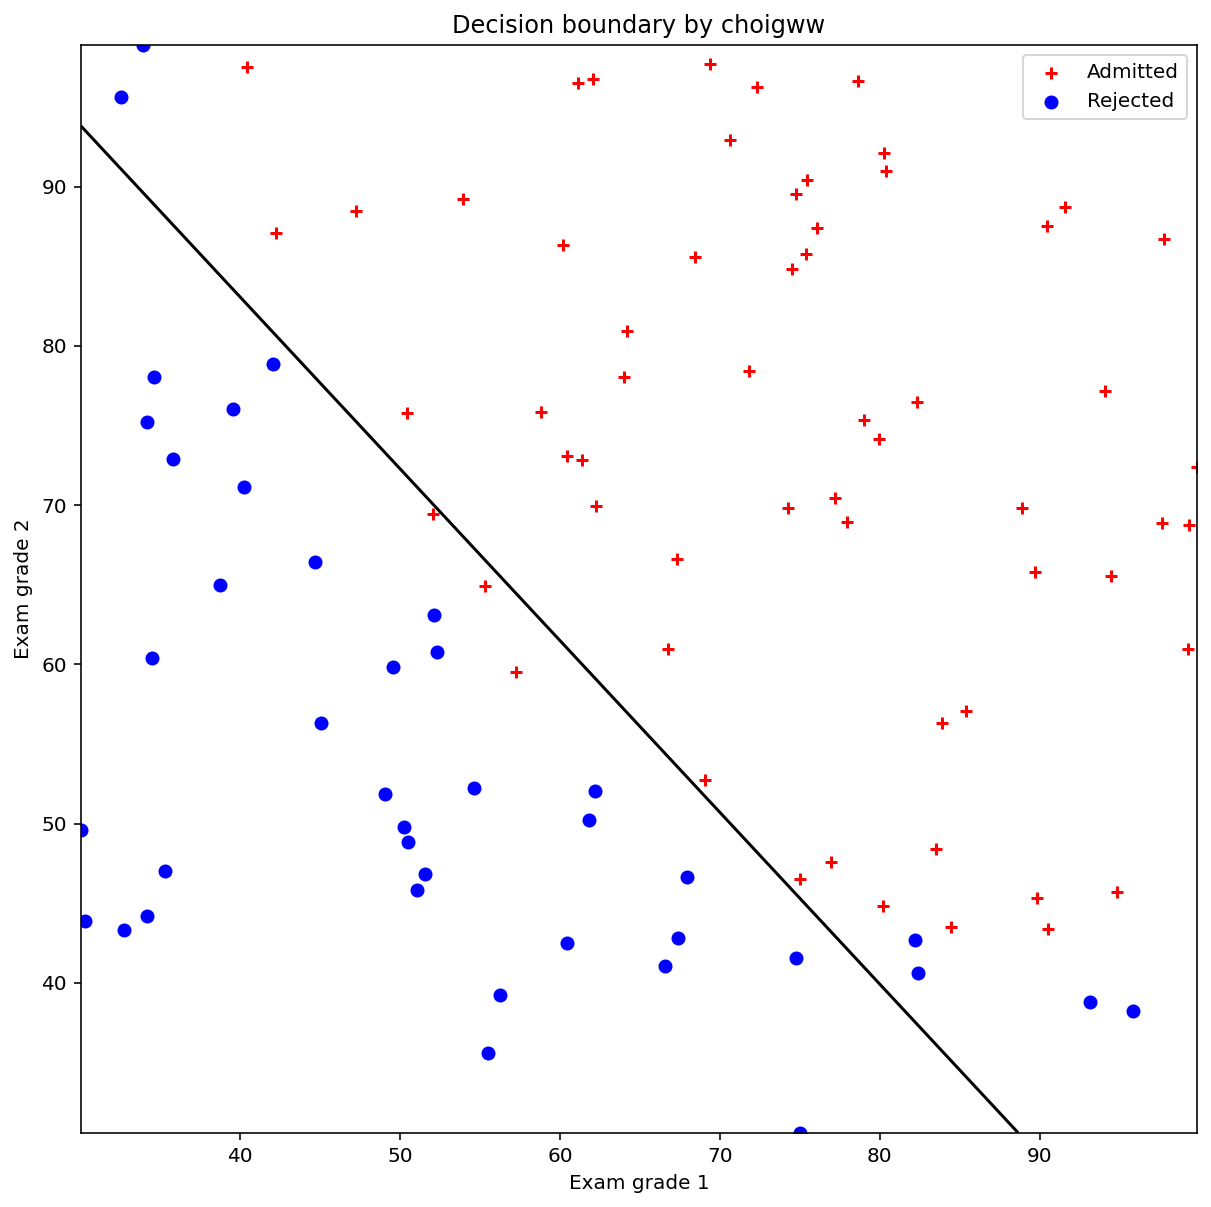

In [87]:
# plot
plt.figure(4,figsize=(10,10))
plt.scatter(x1[idx_admit], x2[idx_admit], marker='+', color='r')
plt.scatter(x1[idx_rejec], x2[idx_rejec], marker='o', color='b') 
plt.contour(xx1, xx2, f_pred(X2, w).reshape(xx1.shape), levels=1, colors=['black'])
plt.xlabel('Exam grade 1')
plt.ylabel('Exam grade 2')
plt.legend(['Admitted', 'Rejected'])
plt.title('Decision boundary by choigww')
plt.show()

# Final Output
##  Plot the decision boundary using the cross-entropy error. Your final submission result should be look like the following graph:

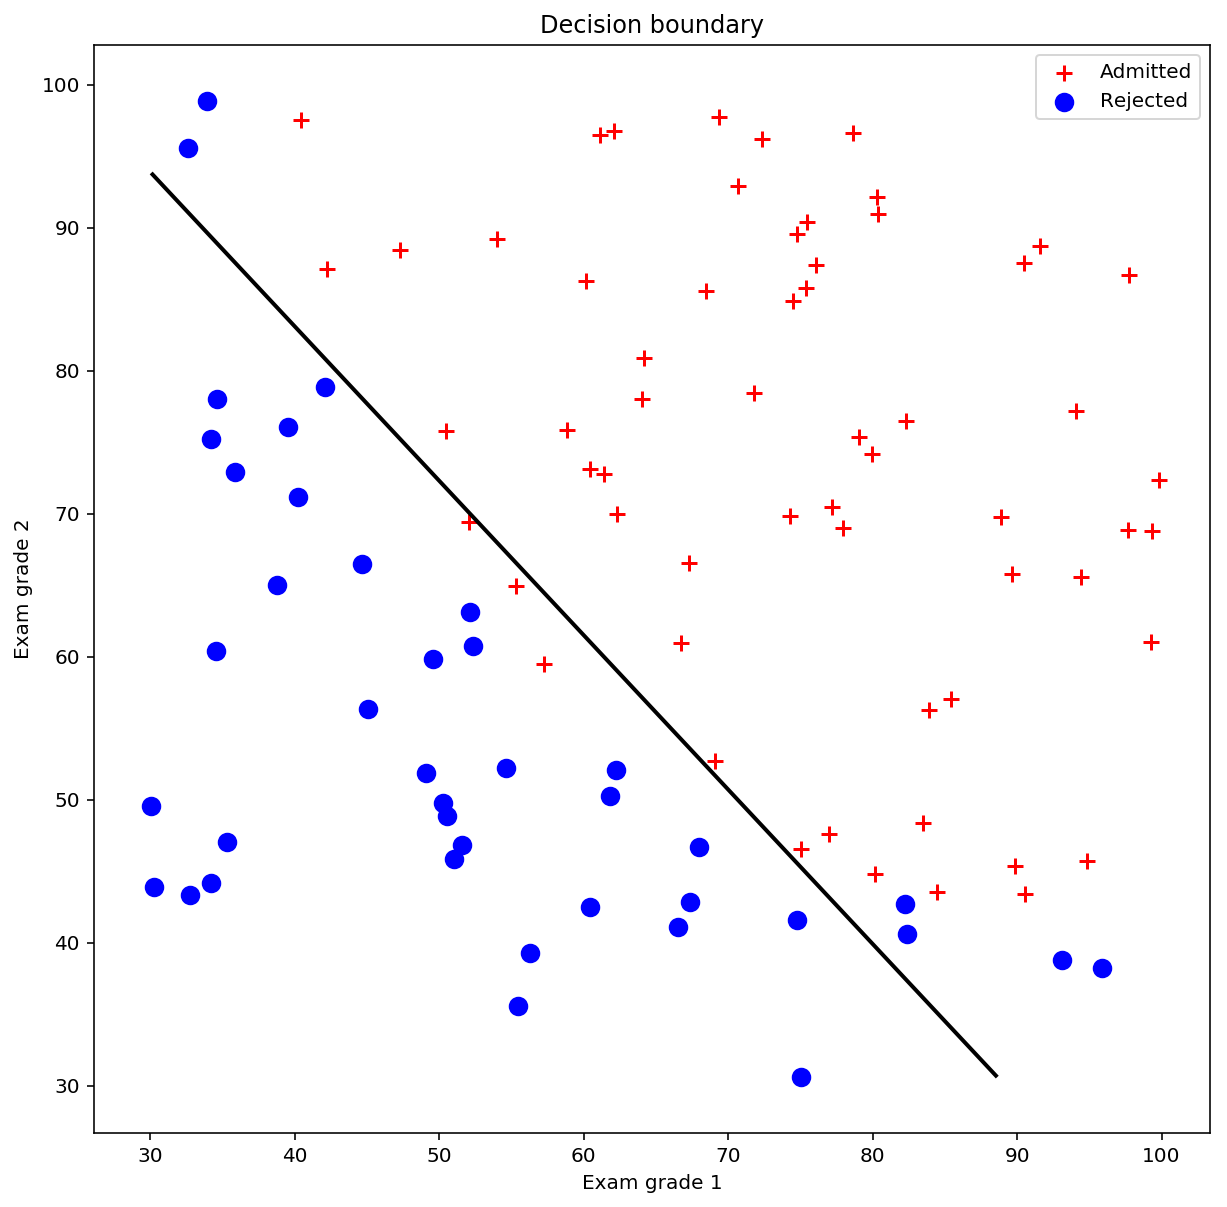